In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

In [ ]:
datos = pd.read_csv("data/housing.csv").dropna()
datos = pd.get_dummies(datos, drop_first=True)
X = datos.drop("median_house_value", axis=1)

max_k = min(10, len(datos) - 1)
valores_k = range(2, max_k + 1)

In [ ]:
inercia_sin_escalar = []
silhouette_sin_escalar = []

for k in valores_k:
    modelo = KMeans(n_clusters=k, n_init=10, random_state=42)
    etiquetas = modelo.fit_predict(X)

    inercia_sin_escalar.append(modelo.inertia_)

    if len(set(etiquetas)) > 1:
        silhouette_sin_escalar.append(silhouette_score(X, etiquetas))
    else:
        silhouette_sin_escalar.append(np.nan)

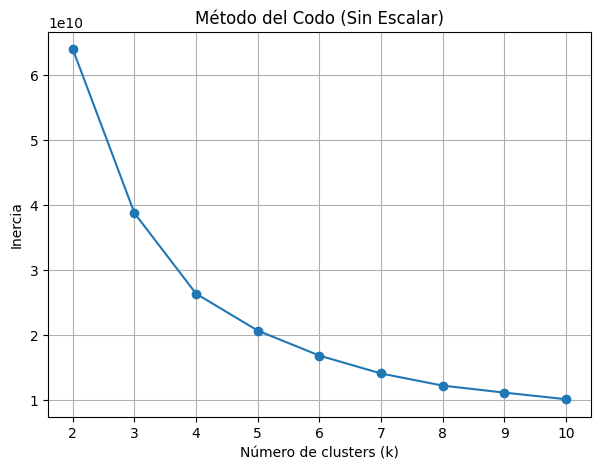

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(valores_k, inercia_sin_escalar, marker="o")
plt.title("Método del Codo (Sin Escalar)")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.grid()
plt.show()

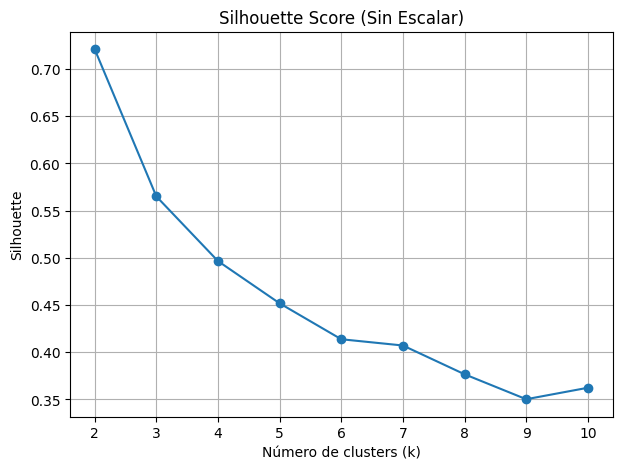

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(valores_k, silhouette_sin_escalar, marker="o")
plt.title("Silhouette Score (Sin Escalar)")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette")
plt.grid()
plt.show()

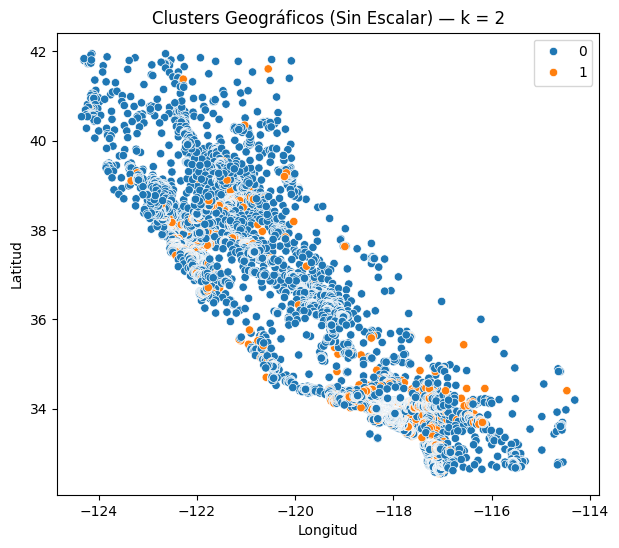

In [ ]:
k_mejor_sin = valores_k[np.nanargmax(silhouette_sin_escalar)]
modelo_sin = KMeans(n_clusters=k_mejor_sin, n_init=10, random_state=42)
etiquetas_sin = modelo_sin.fit_predict(X)

plt.figure(figsize=(7,6))
sns.scatterplot(
    x=datos["longitude"],
    y=datos["latitude"],
    hue=etiquetas_sin,
    palette="tab10"
)
plt.title(f"Clusters Geográficos (Sin Escalar) — k = {k_mejor_sin}")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

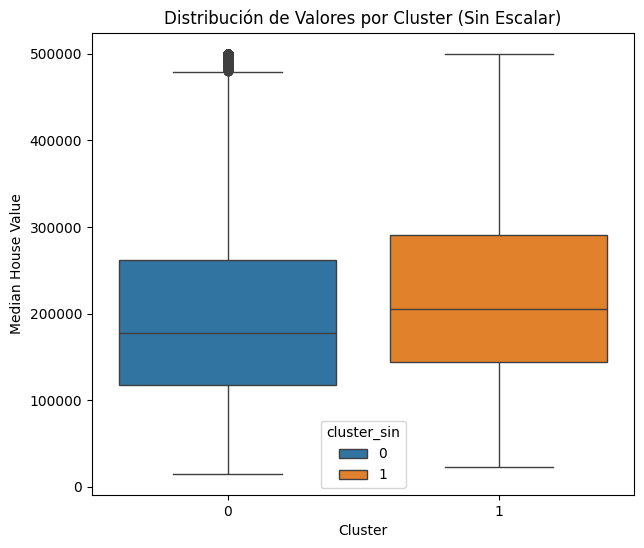

In [ ]:
plt.figure(figsize=(7,6))
temp = datos.copy()
temp["cluster_sin"] = etiquetas_sin
sns.boxplot(data=temp, x="cluster_sin", y="median_house_value", hue="cluster_sin")
plt.title("Distribución de Valores por Cluster (Sin Escalar)")
plt.xlabel("Cluster")
plt.ylabel("Median House Value")
plt.show()

In [ ]:
scaler = StandardScaler()
X_escalado = scaler.fit_transform(X)

In [ ]:
inercia_escalado = []
silhouette_escalado = []

for k in valores_k:
    modelo = KMeans(n_clusters=k, n_init=10, random_state=42)
    etiquetas = modelo.fit_predict(X_escalado)

    inercia_escalado.append(modelo.inertia_)
    silhouette_escalado.append(
        silhouette_score(X_escalado, etiquetas) if len(set(etiquetas)) > 1 else np.nan
    )

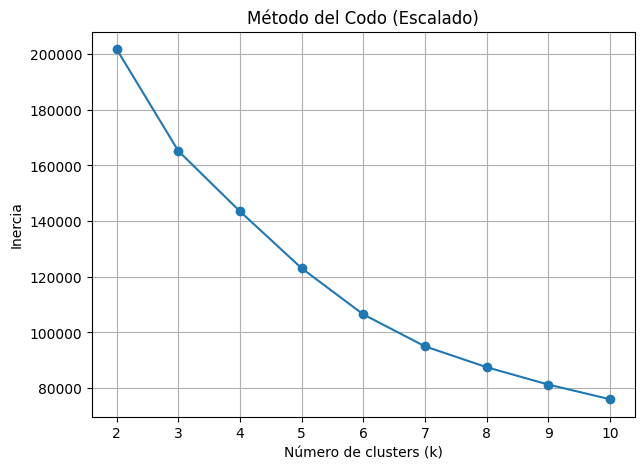

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(valores_k, inercia_escalado, marker="o")
plt.title("Método del Codo (Escalado)")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.grid()
plt.show()

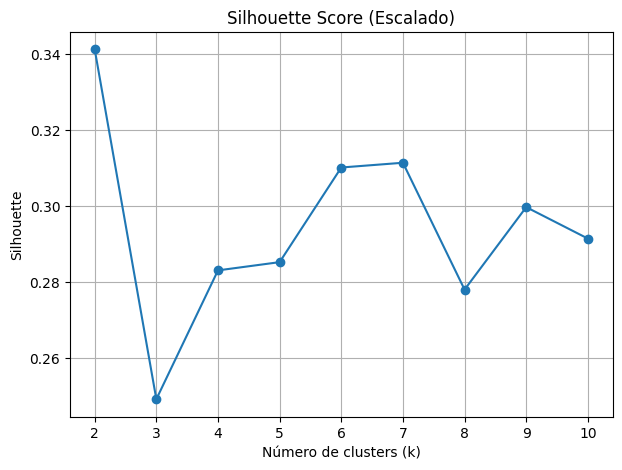

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(valores_k, silhouette_escalado, marker="o")
plt.title("Silhouette Score (Escalado)")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette")
plt.grid()
plt.show()

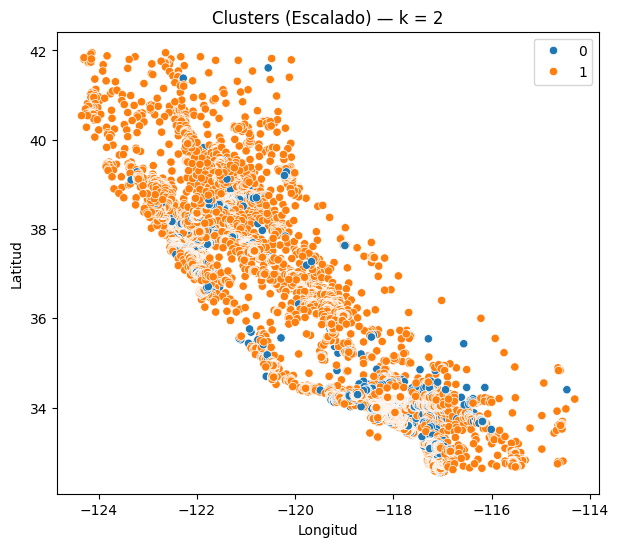

In [ ]:
k_mejor_escalado = valores_k[np.nanargmax(silhouette_escalado)]
modelo_es = KMeans(n_clusters=k_mejor_escalado, n_init=10, random_state=42)
etiquetas_es = modelo_es.fit_predict(X_escalado)

plt.figure(figsize=(7,6))
sns.scatterplot(
    x=datos["longitude"],
    y=datos["latitude"],
    hue=etiquetas_es,
    palette="tab10"
)
plt.title(f"Clusters (Escalado) — k = {k_mejor_escalado}")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

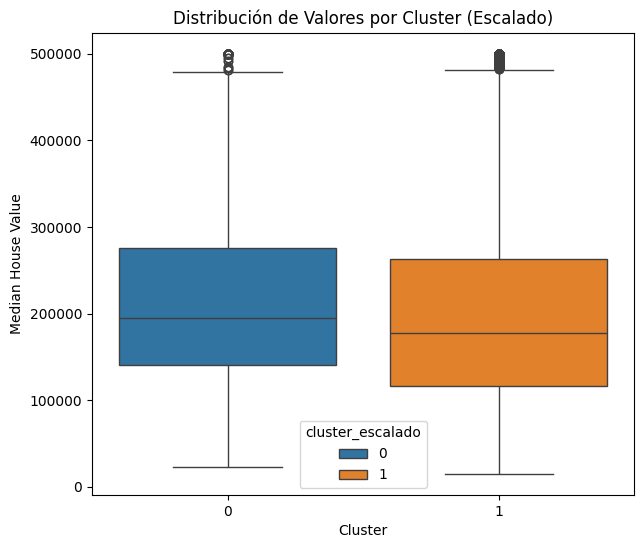

In [ ]:
plt.figure(figsize=(7,6))
temp = datos.copy()
temp["cluster_escalado"] = etiquetas_es
sns.boxplot(data=temp, x="cluster_escalado", y="median_house_value", hue="cluster_escalado")
plt.title("Distribución de Valores por Cluster (Escalado)")
plt.xlabel("Cluster")
plt.ylabel("Median House Value")
plt.show()

In [ ]:
k_optimo = valores_k[np.nanargmax(silhouette_escalado)]
print("Mejor número de clusters según silhouette:", k_optimo)

Mejor número de clusters según silhouette: 2


In [ ]:
mejor_score = -1
mejor_modelo = None
resultados = []

param_grid = {
    "n_init": [10, 20, 30],
    "max_iter": [300, 500, 800],
    "init": ["k-means++", "random"]
}

for n in param_grid["n_init"]:
    for m in param_grid["max_iter"]:
        for ini in param_grid["init"]:
            modelo = KMeans(
                n_clusters=k_optimo,
                n_init=n,
                max_iter=m,
                init=ini,
                random_state=42
            )
            etiquetas = modelo.fit_predict(X_escalado)
            score = silhouette_score(X_escalado, etiquetas)

            resultados.append([n, m, ini, score])

            if score > mejor_score:
                mejor_score = score
                mejor_modelo = modelo

In [ ]:
print("Busqueda de Hiperparametros")
print("n_init:", mejor_modelo.n_init)
print("max_iter:", mejor_modelo.max_iter)
print("Silhouette:", round(mejor_score, 4))

Busqueda de Hiperparametros
n_init: 30
max_iter: 300
Silhouette: 0.3459


In [ ]:
datos["cluster"] = mejor_modelo.labels_

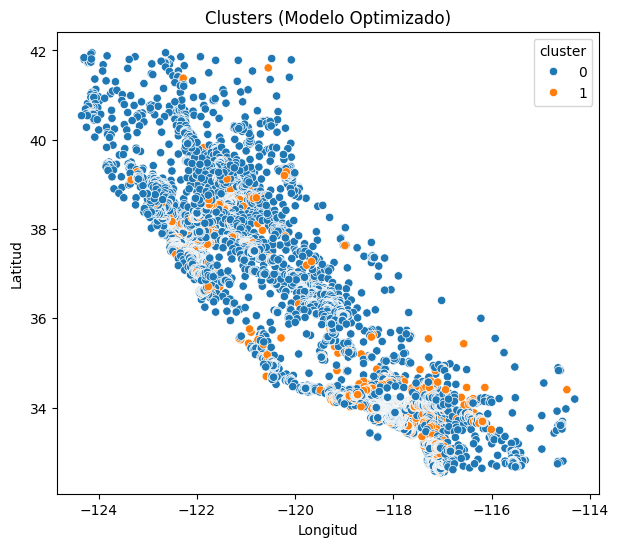

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    x=datos["longitude"],
    y=datos["latitude"],
    hue=datos["cluster"],
    palette="tab10"
)
plt.title("Clusters (Modelo Optimizado)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

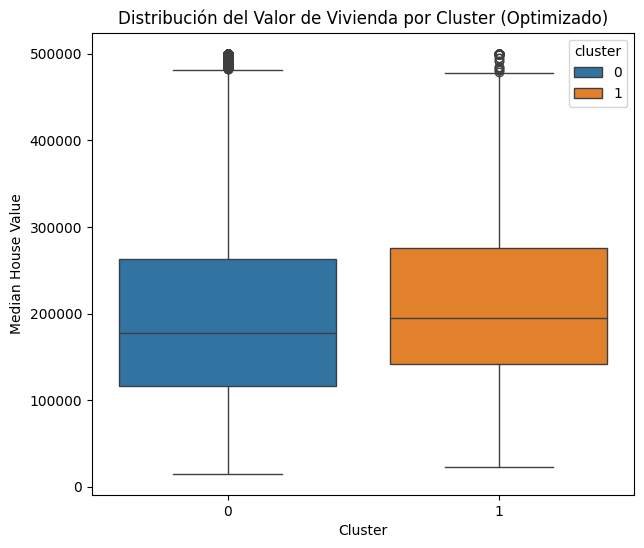

In [ ]:
plt.figure(figsize=(7,6))
sns.boxplot(data=datos, x="cluster", y="median_house_value", hue="cluster")
plt.title("Distribución del Valor de Vivienda por Cluster (Optimizado)")
plt.xlabel("Cluster")
plt.ylabel("Median House Value")
plt.show()

In [ ]:
print("Estadísticas por cluster (modelo optimizado)")
print(datos.groupby("cluster")["median_house_value"].agg(["mean", "median", "count"]))

Estadísticas por cluster (modelo optimizado)
                  mean    median  count
cluster                                
0        205090.888484  177350.0  18114
1        220717.636912  195300.0   2319


In [ ]:
labels_final = mejor_modelo.labels_

silhouette_final = silhouette_score(X_escalado, labels_final)
davies_final = davies_bouldin_score(X_escalado, labels_final)
calinski_final = calinski_harabasz_score(X_escalado, labels_final)

print("Métricas del modelo final")
print("Silhouette Score:", round(silhouette_final, 4))
print("Davies-Bouldin:", round(davies_final, 4))
print("Calinski-Harabasz:", round(calinski_final, 2))

Métricas del modelo final
Silhouette Score: 0.3459
Davies-Bouldin: 1.332
Calinski-Harabasz: 4396.32
